# Process Different Datasets for Supervised Fine-Tuning

## MATH dataset

Download the file [here](https://paperswithcode.com/dataset/math) and upzip the tar file. Move the folder to `data/MATH/`

In [4]:
import os
import json
import pandas as pd

# Initialize an empty list to store DataFrames
df_list = []

# Specify the directory you're working from
root_dir = 'data/MATH/'

# Loop over the directories
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # Ensure the file is a json file
        if file.endswith('.json'):
            # Construct the full filepath
            filepath = subdir + os.sep + file
            # Open each json file
            with open(filepath, 'r') as f:
                data = json.load(f)
                # Convert the json file to dataframe
                temp_df = pd.json_normalize(data)
                # Append the DataFrame to the list
                df_list.append(temp_df)

# Concatenate all the dataframes in the list
df = pd.concat(df_list, ignore_index=True)

In [5]:
df.head()

,problem,level,type,solution
0,Regular hexagon $ABCDEF$ is the base of the ri...,Level 5,Geometry,"[asy]\nimport three;\ntriple A = (1,0,0);\ntri..."
1,"In convex hexagon $ABCDEF$, all six sides are ...",Level 5,Geometry,"Because $\angle\nB$, $\angle C$, $\angle E$, a..."
2,"A unit circle has its center at $(5,0)$ and a ...",Level 3,Geometry,"For this problem, we can use similar triangles..."
3,"What is the area, in square units, of the inte...",Level 4,Geometry,"To find the vertices of the triangle, we find ..."
4,P.J. has a cylindrical mug with a 3-inch diame...,Level 3,Geometry,P.J.'s juice fills up a cylinder with radius 3...


In [9]:
df = df[df['level']!='Level ?']

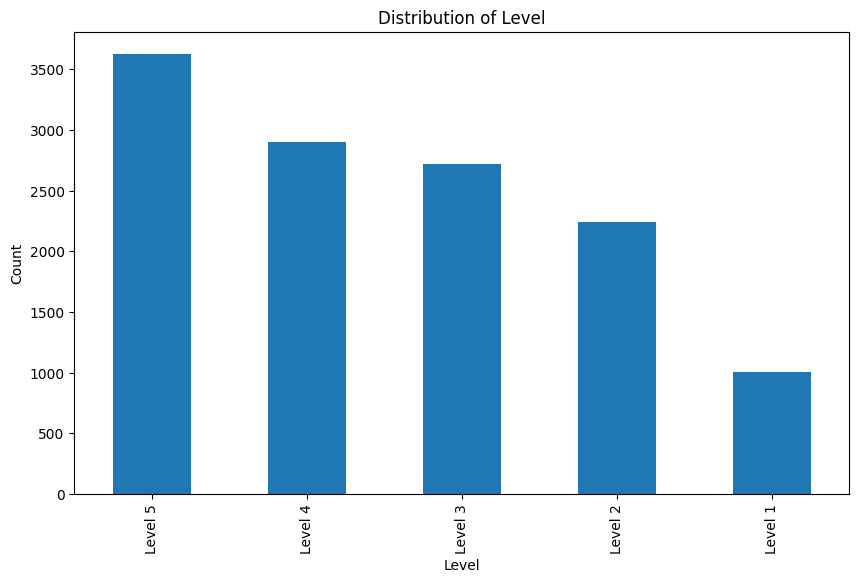

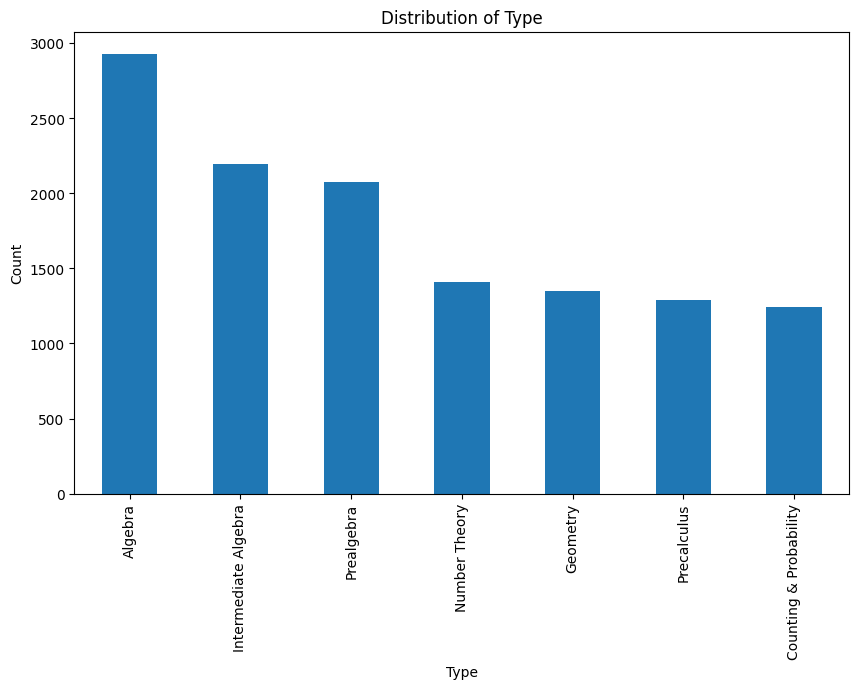

In [10]:
import matplotlib.pyplot as plt

# Count the distribution of 'level'
level_counts = df['level'].value_counts()

# Plot the distribution of 'level'
plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar')
plt.title('Distribution of Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

# Count the distribution of 'type'
type_counts = df['type'].value_counts()

# Plot the distribution of 'type'
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [23]:
# Randomly sample 1000 examples from the DataFrame
sample_df = df.sample(n=1000, random_state=1)
sample_df.reset_index(drop=True, inplace=True)

# Print the sampled DataFrame
sample_df.head()

,problem,level,type,solution
0,Let $f$ be defined by \[f(x) = \left\{\n\begi...,Level 5,Algebra,The number $f^{-1}(-3)$ is the value of $x$ su...
1,Mr. Fat needs 20 minutes to eat a pound of cer...,Level 4,Algebra,Mr. Fat eats cereal at a rate of $\frac{1}{20}...
2,A line has slope $\frac{2}{5}.$ Which of the ...,Level 2,Precalculus,"Since the slope of the line is $\frac{2}{5},$ ..."
3,"In parallelogram $ABCD$, the measure of angle ...",Level 4,Prealgebra,"[asy]\nunitsize(1inch);\npair A,B,C,D;\nB = (0..."
4,Find the number of real roots of $x^3 + 3x + 5...,Level 2,Intermediate Algebra,Let $f(x) = x^3 + 3x + 5.$ Note that $f(x)$ i...


In [24]:
# Check if there's duplicate question
duplicate_bool = df.duplicated(subset=['problem'])
duplicate_bool.sum()

0

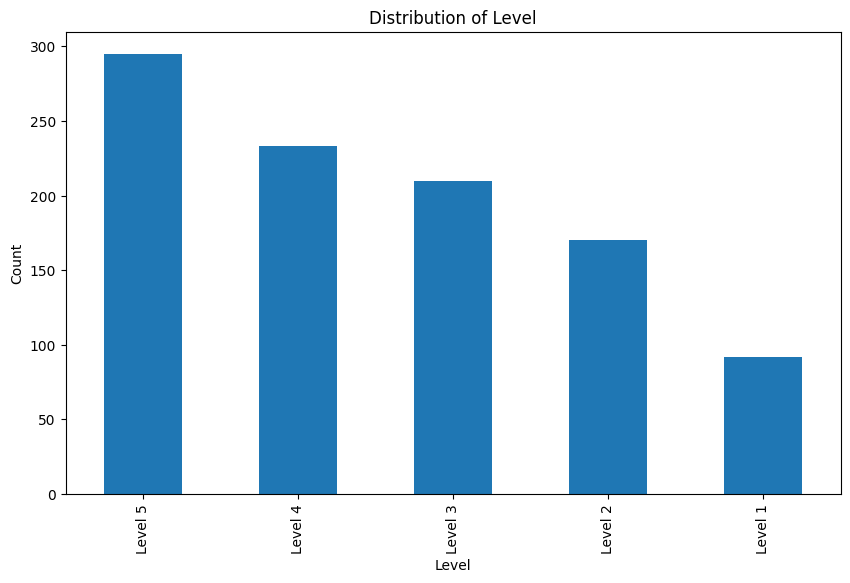

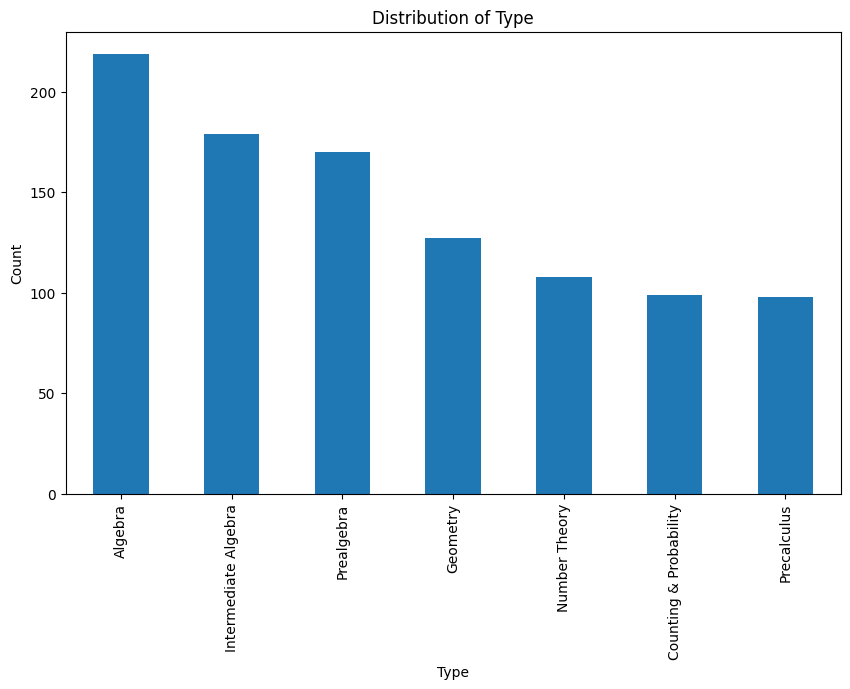

In [25]:
# Count the distribution of 'level'
level_counts = sample_df['level'].value_counts()

# Plot the distribution of 'level'
plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar')
plt.title('Distribution of Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

# Count the distribution of 'type'
type_counts = sample_df['type'].value_counts()

# Plot the distribution of 'type'
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Call ChatGPT API to regenerate the the answer given the correct answer. Put you key to `./secrets/api_key.json` (write a string with quote signs: "{your key}") and run the cell below.

In [33]:
# Call ChatGPT API to regenerate the the answer given the correct answer
import gpt_wrapper
from tqdm import tqdm
from gpt_wrapper import APIException
gpt_wrapper.api_key = json.load(open("./secrets/api_key.json", "r"))
from gpt_wrapper.chat import Chat

# what should we do as system input?
def generate_positive_sample(datapoint, print_chatgpt_input=False):
    # annotation with ChatGPT
    chat = gpt_wrapper.chat.Chat.create(name="Annotator")

    # initialize the instruction and the question
    instruction = "Given the question "
    question_body = "Question: " + datapoint["problem"]

    # this is the case for a question with a single answer
    question_body += "\nAnswer:\n" + str(datapoint["solution"])
    instruction += "and the correct answer, repeat the answer and produce a justification why the given answer is correct."
    
    # for debugging purposes
    if print_chatgpt_input:
        print("Question body:\n", question_body, "\n\n", "Instruction:\n", instruction)
    
    try:
        output = chat.ask(content=question_body, instruction=instruction, model_args={"max_tokens": 1024})
    except APIException as exception:
        exception_msg = exception.args[0]
        print("Error for id: ", datapoint.name, ": ", exception)
        return ""
    return output.content.strip()

In [34]:
print(f"""
Generated ans.: {generate_positive_sample(df.iloc[2375], True)}
""")

Question body:
 Question: In how many ways can 4 distinct beads be placed on a bracelet that has a knot in it?  (Beads cannot slide past the knot.  Two ways are considered the same if one is a reflection of the other, since we can flip the bracelet over.)
Answer:
We can just treat the knot as another bead. There are $5!$ ways to place the beads and the knot on the bracelet, but we must divide by 5 for rotational symmetry (5 rotations for each arrangement), and by 2 for reflectional symmetry (we can flip the bracelet to get the same arrangement).  The answer is $\dfrac{5!}{5 \times 2} = \boxed{12}$. 

 Instruction:
 Given the question and the correct answer, repeat the answer and produce a justification why the given answer is correct.

Generated ans.: The answer is $\boxed{12}$. We can justify this by treating the knot as another bead, which means that we have 5 distinct beads to place on the bracelet. There are $5!$ ways to place these beads, but we must divide by 5 for rotational sym

In [35]:
from tqdm import tqdm
tqdm.pandas()

# Apply the function to each row of the DataFrame
sample_df['chatgpt_answer'] = sample_df.progress_apply(generate_positive_sample, axis=1)

100%|██████████| 1000/1000 [45:05<00:00,  2.71s/it] 


In [36]:
def generate_interaction(datapoint):
    interaction_string = "User: " + datapoint["problem"] + "\n\n"
    interaction_string += "Assistant: " + datapoint["chatgpt_answer"]
    return interaction_string


# Apply the function to each row of the DataFrame
sample_df['interaction'] = sample_df.progress_apply(generate_interaction, axis=1)

100%|██████████| 1000/1000 [00:00<00:00, 62703.56it/s]


In [39]:
# Select only the columns you want to keep and rename them
processed_df = sample_df[['level', 'interaction']].rename(columns={'level': 'level', 'interaction': 'chat'})

# Reset the index and rename the index column to 'id'
processed_df.reset_index(inplace=True)
processed_df.rename(columns={'index': 'id'}, inplace=True)

# Save the DataFrame to a JSON file
processed_df.to_json('data/gen_dataset_mhy_math.json', orient='records')

In [ ]:
raise

## OpenBookQA dataset

Download the file [here](https://ai2-public-datasets.s3.amazonaws.com/open-book-qa/OpenBookQA-V1-Sep2018.zip) and unzip the file. Move the folder to `data/OpenBookQA/`

In [1]:
import pandas as pd
import json

# Define function to read a .jsonl file and return it as a pandas DataFrame
def jsonl_to_df(filepath):
    data = []

    with open(filepath, 'r') as file:
        for line in file:
            item = json.loads(line.strip())

            # Extract question stem and choices
            question = item['question']['stem']
            choices = "\n".join([f"{choice['label']}: {choice['text']}" for choice in item['question']['choices']])

            # Append id, question, choices, and answerKey as a dictionary to the data list
            data.append({
                'id': item['id'],
                'question': question,
                'choices': choices,
                'answerKey': item['answerKey']
            })

    return pd.DataFrame(data)

# Define the file paths
filepaths = [
    'data/OpenBookQA/Additional/train_complete.jsonl',
    'data/OpenBookQA/Additional/dev_complete.jsonl',
    'data/OpenBookQA/Additional/test_complete.jsonl'
]

# Convert each .jsonl file to a DataFrame and concatenate them
df = pd.concat([jsonl_to_df(filepath) for filepath in filepaths], ignore_index=True)

In [2]:
df.head()

,id,question,choices,answerKey
0,7-980,The sun is responsible for,A: puppies learning new tricks\nB: children gr...,D
1,7-584,When standing miles away from Mount Rushmore,A: the mountains seem very close\nB: the mount...,D
2,7-870,When food is reduced in the stomach,A: the mind needs time to digest\nB: take a se...,C
3,7-321,Stars are,A: warm lights that float\nB: made out of nitr...,C
4,9-732,You can make a telescope with a,A: straw\nB: Glass\nC: Candle\nD: mailing tube,D


In [3]:
duplicate_bool = df.duplicated(subset=['question', 'choices'])
df.drop_duplicates(subset=['question', 'choices'], inplace=True)

In [4]:
# Randomly sample 1000 examples from the DataFrame
sample_df = df.sample(n=1000, random_state=1)
sample_df.reset_index(drop=True, inplace=True)

# Print the sampled DataFrame
sample_df.head()

,id,question,choices,answerKey
0,13-726,A stage in the life cycle process includes wha...,A: killing of kin\nB: entity replication\nC: t...,B
1,1047,Evaporation,A: causes puddles to become dried out mud\nB: ...,A
2,11-583,A bud will want pollen to be extracted and the...,A: assistance from vice principals\nB: deliver...,C
3,10-416,Invisible forces work to keep the moon near the,A: sun\nB: uranus\nC: mars\nD: our home planet,D
4,9-858,What will increase when a substance absorbs so...,A: weight\nB: height\nC: hotness\nD: nutrition,C


In [5]:
# Call ChatGPT API to regenerate the the answer given the correct answer
import gpt_wrapper
from tqdm import tqdm
from gpt_wrapper import APIException
gpt_wrapper.api_key = json.load(open("./secrets/api_key.json", "r"))
from gpt_wrapper.chat import Chat

# what should we do as system input?
def generate_positive_sample(datapoint, print_chatgpt_input=False):
    # annotation with ChatGPT
    chat = gpt_wrapper.chat.Chat.create(name="Annotator")

    # first, generate a complete question sentence with choices
    instruction = "Given the question and choices. Ask the question and give the ABCD choices again with complete sentences."
    question_body = "Question: " + datapoint["question"] + "\n"
    question_body += "Choices:\n" + datapoint["choices"]
    
    # for debugging purposes
    if print_chatgpt_input:
        print("Question body:\n", question_body, "\n\n", "Instruction:\n", instruction)
        print("")
        
    try:
        question = chat.ask(content=question_body, instruction=instruction, model_args={"max_tokens": 1024})
    except APIException as exception:
        exception_msg = exception.args[0]
        print("Error for id: ", datapoint.name, ": ", exception)
        question = ""

    # now, given the complete question sentence with choices, generate the answer
    instruction = "Given the question, choices, and the correct answer. Repeat the answer and produce a justification why the given answer is correct."
    question_body = question.content.strip() + "\n"
    # add the answer to the question body
    question_body += "Answer:\n" + datapoint["answerKey"]
    
    # for debugging purposes
    if print_chatgpt_input:
        print("Question body:\n", question_body, "\n\n", "Instruction:\n", instruction)
    
    try:
        output = chat.ask(content=question_body, instruction=instruction, model_args={"max_tokens": 1024})
    except APIException as exception:
        exception_msg = exception.args[0]
        print("Error for id: ", datapoint.name, ": ", exception)
        output = ""
    return pd.Series([question.content.strip(), output.content.strip()])

In [7]:
question, answer = generate_positive_sample(df.iloc[4096], True)
print(f"""
      question: {question}\n
      answer: {answer}
      """)

Question body:
 Question: A ferret darting around a space in the wild in a panic is likely
Choices:
A: grooming itself
B: eluding foe
C: winning marathons
D: laying eggs 

 Instruction:
 Given the question and choices. Ask the question and give the ABCD choices again with complete sentences.

Question body:
 What is a ferret likely doing when it is darting around a space in the wild in a panic?
A: It is likely grooming itself.
B: It is likely eluding foe.
C: It is likely winning marathons.
D: It is likely laying eggs.
Answer:
B 

 Instruction:
 Given the question, choices, and the correct answer. Repeat the answer and produce a justification why the given answer is correct.

      question: What is a ferret likely doing when it is darting around a space in the wild in a panic?
A: It is likely grooming itself.
B: It is likely eluding foe.
C: It is likely winning marathons.
D: It is likely laying eggs.

      answer: The ferret is likely eluding a foe when it is darting around in a space

In [8]:
from tqdm import tqdm
tqdm.pandas()

# Apply the function to each row of the DataFrame
sample_df[['chatgpt_question', 'chatgpt_answer']] = sample_df.progress_apply(generate_positive_sample, axis=1)

 76%|███████▋  | 765/1000 [33:45<11:31,  2.94s/it] 

Server timeout.
Retrying in 10 seconds...


100%|██████████| 1000/1000 [44:24<00:00,  2.66s/it]


In [9]:
def generate_interaction(datapoint):
    interaction_string = "User: " + datapoint["chatgpt_question"] + "\n\n"
    interaction_string += "Assistant: " + datapoint["chatgpt_answer"]
    return interaction_string


# Apply the function to each row of the DataFrame
sample_df['interaction'] = sample_df.progress_apply(generate_interaction, axis=1)

100%|██████████| 1000/1000 [00:00<00:00, 62161.78it/s]


In [10]:
# Select only the columns you want to keep and rename them
processed_df = sample_df[['id', 'interaction']].rename(columns={'interaction': 'chat'})
processed_df.reset_index(inplace=True)

# Save the DataFrame to a JSON file
processed_df.to_json('data/gen_dataset_mhy_openbookqa.json', orient='records')

In [ ]:
raise

## Augment Student Annotated Dialogues

In [1]:
import json
import re
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def process_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    # Filter out entries with "confidence" less than 5.
    data = [entry for entry in data if entry['confidence'] >= 5]
    
    # Filter out entries with tokenized length greater than 800.
    data = [entry for entry in data if len(tokenizer.tokenize(entry['chat'])) <= 1024]
    
    # Filter out entries without "Assistant: " in the "chat" string.
    data = [entry for entry in data if len(entry['chat'].rsplit('Assistant: ', 1)) == 2]

    processed_data = []
    for entry in data:
        if entry['confidence'] != 6:
            # Split the "chat" string at " User: " markers.
            segments = re.split('User: ', entry['chat'])
            
            # Truncate the last "User:" interaction if it exists.
            if len(segments) > 1 and 'Assistant:' not in segments[-1]:
                segments = segments[:-1]
            
            # Split into multiple examples.
            for i in range(2, len(segments) + 1):
                new_entry = entry.copy()
                copy_segments = segments.copy()[:i]
                copy_segments[-1] = copy_segments[-1][:copy_segments[-1].find('\n\nSystem:')]
                new_entry['chat'] = ' User: '.join(copy_segments)
                processed_data.append(new_entry)
        else:
            processed_data.append(entry)

    return processed_data

In [2]:
train_data = process_file('data/m2/gen_dataset_mhy_train.json')
val_data = process_file('data/m2/gen_dataset_mhy_val.json')

with open('data/gen_dataset_mhy_train.json', 'w') as f:
    json.dump(train_data, f)
with open('data/gen_dataset_mhy_val.json', 'w') as f:
    json.dump(val_data, f)

In [12]:
import json
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

path = 'data/gen_dataset_mhy_math.json'
path_filter = 'data/filter_gen_dataset_mhy_math.json' 

with open(path, 'r') as f:
    raw_data = json.load(f)

filter_data = []
for item in raw_data:
    if len(item['chat'].rsplit('Assistant: ', 1)) == 2:
        filter_data.append(item)

# Filter out entries with tokenized length greater than 1024.
filter_data = [entry for entry in filter_data if len(tokenizer.tokenize(entry['chat'])) <= 1024]

with open(path_filter, 'w') as f:
    json.dump(filter_data, f)

In [13]:
import json
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

path = 'data/gen_dataset_mhy_openbookqa.json'
path_filter = 'data/filter_gen_dataset_mhy_openbookqa.json' 

with open(path, 'r') as f:
    raw_data = json.load(f)

filter_data = []
for item in raw_data:
    if len(item['chat'].rsplit('Assistant: ', 1)) == 2:
        filter_data.append(item)

# Filter out entries with tokenized length greater than 1024.
filter_data = [entry for entry in filter_data if len(tokenizer.tokenize(entry['chat'])) <= 1024]

with open(path_filter, 'w') as f:
    json.dump(filter_data, f)

In [14]:
import json
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

path = 'data/gen_dataset_mhy_train.json'
path_filter = 'data/filter_gen_dataset_mhy_train.json' 

with open(path, 'r') as f:
    raw_data = json.load(f)

filter_data = []
for item in raw_data:
    if len(item['chat'].rsplit('Assistant: ', 1)) == 2:
        filter_data.append(item)

# Filter out entries with tokenized length greater than 1024.
filter_data = [entry for entry in filter_data if len(tokenizer.tokenize(entry['chat'])) <= 1024]

with open(path_filter, 'w') as f:
    json.dump(filter_data, f)

In [15]:
import json
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

path = 'data/gen_dataset_mhy_val.json'
path_filter = 'data/filter_gen_dataset_mhy_val.json' 

with open(path, 'r') as f:
    raw_data = json.load(f)

filter_data = []
for item in raw_data:
    if len(item['chat'].rsplit('Assistant: ', 1)) == 2:
        filter_data.append(item)

# Filter out entries with tokenized length greater than 1024.
filter_data = [entry for entry in filter_data if len(tokenizer.tokenize(entry['chat'])) <= 1024]

with open(path_filter, 'w') as f:
    json.dump(filter_data, f)

## PPO Dataset

In [3]:
import json
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

train_path = 'data/gen_dataset_mhy_train.json'
val_path = 'data/gen_dataset_mhy_val.json'
math_path = 'data/gen_dataset_mhy_math.json'
qa_path = 'data/gen_dataset_mhy_openbookqa.json'
ppo_train_path = 'data/ppo_dataset_mhy_train.json'
ppo_val_path = 'data/ppo_dataset_mhy_val.json'
ppo_math_path = 'data/ppo_dataset_mhy_math.json'
ppo_qa_path = 'data/ppo_dataset_mhy_openbookqa.json'

def process_ppo(file_path):
    with open(file_path, 'r') as f:
        raw_data = json.load(f)

    filter_data = []
    for item in raw_data:
        if len(item['chat'].rsplit('Assistant: ', 1)) == 2:
            filter_data.append(item)

    # Filter out entries with tokenized length greater than 1024.
    filter_data = [entry for entry in filter_data if len(tokenizer.tokenize(entry['chat'])) <= 512]

    return filter_data

ppo_train_data = process_ppo(train_path)
ppo_val_data = process_ppo(val_path)
ppo_math_data = process_ppo(math_path)
ppo_qa_data = process_ppo(qa_path)

ppo_train_data += ppo_math_data
ppo_train_data += ppo_qa_data
# sample to 2000
import random
random.shuffle(ppo_train_data)
ppo_train_data = ppo_train_data[:2000]

with open(ppo_train_path, 'w') as f:
    json.dump(ppo_train_data, f)
with open(ppo_val_path, 'w') as f:
    json.dump(ppo_val_data, f)